In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functions as func

In [2]:
# generate requested epochs for the query
start_epoch = 2459180.5
epochs = start_epoch + np.arange(5, 5.4, 0.002)
reduc_epoch = epochs - start_epoch
#print(epochs)
print(len(epochs))

201


# TEST 1: SAME POSITIONS FOR EARTH AND SUN
### $\mathrm{s}=(1,0,0)$, $\mathrm{e}=(1,0,0)$, $\beta=90^\circ$, $\lambda=0^\circ$, $(a_1,b_1,c_1)=(2,1,1)$, $(a_2,b_2,c_2)=(1,1,1)$, $d=3$: approx. 3 times amplitude, equal max, slightly different min

Body consists of:
Ellipsis with axes: a=2, b=1, c=1,
Ellipsis with axes: a=1, b=1, c=1,
lat=0.0 deg, lon=90.0 deg, phase=0.0, distance=3
min_brightness: 0.67, max_brightness: 2.15, max/min: 3.20


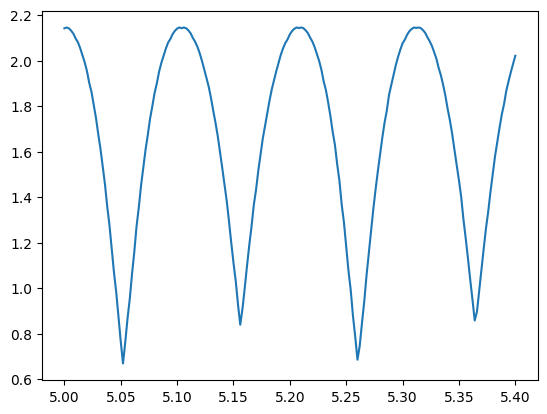

In [41]:
# create two ellipsoids with specified parameters
ellips1 = func.Ellipsoid(a=2, b=1, c=1)
ellips2 = func.Ellipsoid(a=1, b=1, c=1)
# create body from two ellipsis
body = func.Body(ellips1, ellips2, distance=3, 
                 eq_latitude=0,
                 eq_longitude=np.pi / 2, 
                 init_phase=0., rotation_period=5.0/24)
print(body)
# same position for earth and sun
state_vecs_sun = np.zeros([201, 3])
state_vecs_sun[:, 1] = 1
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['reduc_epoch'] = reduc_epoch

#tate_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = np.zeros([201, 4])
state_vecs_earth[:, 0] = 1
state_vecs_earth[:, 3] = reduc_epoch
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])


# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)
  
plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)
print(f"min_brightness: {min(total_brightness):.2f}, max_brightness: {max(total_brightness):.2f}, max/min: {max(total_brightness)/min(total_brightness):.2f}")

# TEST 2: OPPOSITE POSITIONS FOR EARTH AND SUN
### $\mathrm{s}=(1,0,0)$, $\mathrm{e}=(-1,0,0)$. Brightness should be zero

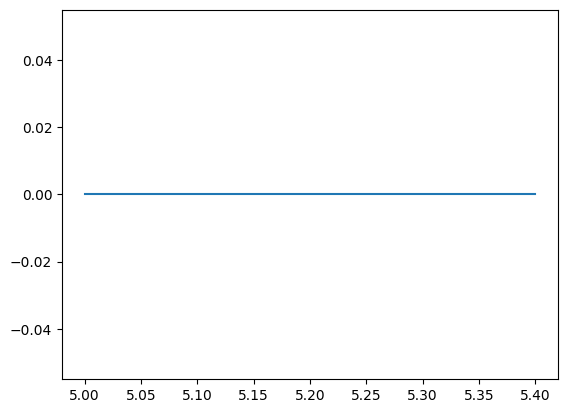

In [42]:
state_vecs_sun = np.zeros([201, 3])
state_vecs_sun[:, 0] = -1
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['reduc_epoch'] = reduc_epoch
state_vecs_sun
state_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])
state_vecs_earth['x'] = 1

# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)
plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)

# TEST 3: CONSTANT BRIGHTNESS
### $\mathrm{s}=(0,0,-1)$, $\mathrm{e}=(0,0,-1)$. Constant brightness with brightness equal to max brightness

Body consists of:
Ellipsis with axes: a=2, b=1, c=1,
Ellipsis with axes: a=1, b=1, c=1,
lat=90.0 deg, lon=0.0 deg, phase=0.0, distance=3
min_brightness: 6.7407983701, max_brightness: 6.74, max/min: 1.00


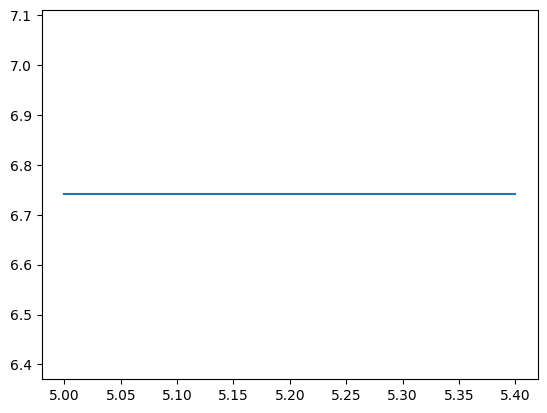

In [43]:
# create two ellipsoids with specified parameters
ellips1 = func.Ellipsoid(a=2, b=1, c=1)
ellips2 = func.Ellipsoid(a=1, b=1, c=1)
# create body from two ellipsis
body = func.Body(ellips1, ellips2, distance=3, 
                 eq_latitude=np.pi / 2,
                 eq_longitude=0, 
                 init_phase=0., rotation_period=5.0/24)
print(body)


state_vecs_sun = np.zeros([201, 3])
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['z'] = -1
state_vecs_sun['reduc_epoch'] = reduc_epoch
state_vecs_sun
state_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])
#state_vecs_earth['z'] = -1

# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)

plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)
print(f"min_brightness: {min(total_brightness):.10f}, "
      f"max_brightness: {max(total_brightness):.2f}, "
      f"max/min: {max(total_brightness)/min(total_brightness):.2f}")

# TEST 4: CONSTANT BRIGHTNESS
### $\mathrm{s}=(1/2,1/2,1/\sqrt{2})$, $\mathrm{e}=(1/2,1/2,1/\sqrt{2})$, $\beta=45^\circ$, $\lambda=45^\circ$, $(a_1,b_1,c_1)=(2,1,1)$, $(a_2,b_2,c_2)=(1,1,1)$, $d=3$: the same as 3, but with a phase shift

Body consists of:
Ellipsis with axes: a=2, b=1, c=1,
Ellipsis with axes: a=1, b=1, c=1,
lat=45.0 deg, lon=45.0 deg, phase=0.0, distance=3
min_brightness: 6.74, max_brightness: 6.74, max/min: 1.00


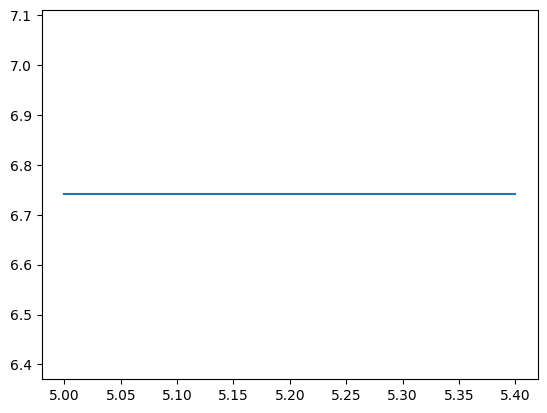

In [44]:
# create two ellipsoids with specified parameters
ellips1 = func.Ellipsoid(a=2, b=1, c=1)
ellips2 = func.Ellipsoid(a=1, b=1, c=1)
# create body from two ellipsis
body = func.Body(ellips1, ellips2, distance=3, 
                 eq_latitude=np.pi / 4, 
                 eq_longitude=np.pi / 4, 
                 init_phase=0., rotation_period=5.0/24)
print(body)


state_vecs_sun = np.zeros([201, 3])
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['x'] = 1/2
state_vecs_sun['y'] = 1/2
state_vecs_sun['z'] = 1/(2**0.5)
state_vecs_sun['reduc_epoch'] = reduc_epoch
state_vecs_sun
state_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])

# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)

plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)
print(f"min_brightness: {min(total_brightness):.2f}, "
      f"max_brightness: {max(total_brightness):.2f}, "
      f"max/min: {max(total_brightness)/min(total_brightness):.2f}")

# TEST 5: ONE OF THE COMPONENTS IS SMALL
### any $\mathrm{s}$, $\mathrm{e}$, $\beta$, $\lambda$, $(a_1,b_1,c_1)=(1,1,1)$, $(a_2,b_2,c_2)=(0.001,0.001,0.001)$, $d=3$. Should give constant brightness

Body consists of:
Ellipsis with axes: a=1, b=1, c=1,
Ellipsis with axes: a=0.001, b=0.001, c=0.001,
lat=45.0 deg, lon=45.0 deg, phase=0.0, distance=3
min_brightness: 2.096, max_brightness: 2.096, max/min: 1.0000000000


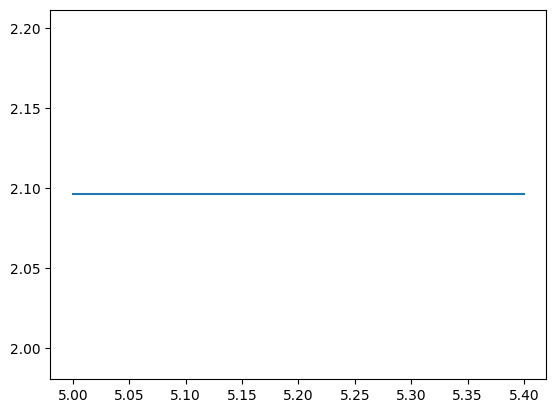

In [45]:
# create two ellipsoids with specified parameters
ellips1 = func.Ellipsoid(a=1, b=1, c=1)
ellips2 = func.Ellipsoid(a=0.001, b=0.001, c=0.001)
# create body from two ellipsis
body = func.Body(ellips1, ellips2, distance=3, 
                 eq_latitude=np.pi / 4, 
                 eq_longitude=np.pi / 4, 
                 init_phase=0., rotation_period=5.0/24)
print(body)# create two ellipsoids with specified parameters

# same position for earth and sun
state_vecs_sun = np.zeros([201, 3])
state_vecs_sun[:, 0] = -1
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['reduc_epoch'] = reduc_epoch
state_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])

# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)

plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)
print(f"min_brightness: {min(total_brightness):.3f}, "
      f"max_brightness: {max(total_brightness):.3f}, "
      f"max/min: {max(total_brightness)/min(total_brightness):.10f}")

Body consists of:
Ellipsis with axes: a=1, b=1, c=1,
Ellipsis with axes: a=1, b=1, c=1,
lat=0.0 deg, lon=90.0 deg, phase=0.0, distance=2
min_brightness: 2.094, max_brightness: 4.189, max/min: 1.9999141221


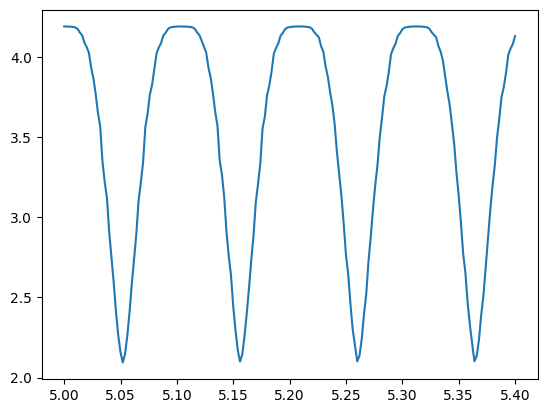

In [46]:
# create two ellipsoids with specified parameters
ellips1 = func.Ellipsoid(a=1, b=1, c=1)
ellips2 = func.Ellipsoid(a=1, b=1, c=1)
# create body from two ellipsis
body = func.Body(ellips1, ellips2, distance=2, 
                 eq_latitude=0, 
                 eq_longitude=np.pi / 2, 
                 init_phase=0., rotation_period=5.0/24)
print(body)# create two ellipsoids with specified parameters

# same position for earth and sun
state_vecs_sun = np.zeros([201, 3])
state_vecs_sun[:, 0] = -1
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['reduc_epoch'] = reduc_epoch
state_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])

# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)

plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)
print(f"min_brightness: {min(total_brightness):.3f}, "
      f"max_brightness: {max(total_brightness):.3f}, "
      f"max/min: {max(total_brightness)/min(total_brightness):.10f}")

# TEST 6: COMPONENTS ARE VERY SEPARATED
### any $\mathrm{s}$, $\mathrm{e}$, $\beta$, $\lambda$, $(a_1,b_1,c_1)=(1,1,1)$, $(a_2,b_2,c_2)=(1,1,1)$, $d=1000$. Should give constant brightness twice as before

Body consists of:
Ellipsis with axes: a=1, b=1, c=1,
Ellipsis with axes: a=1, b=1, c=1,
lat=45.0 deg, lon=45.0 deg, phase=0.0, distance=100
min_brightness: 4.19, max_brightness: 4.19, max/min: 1.0000000000


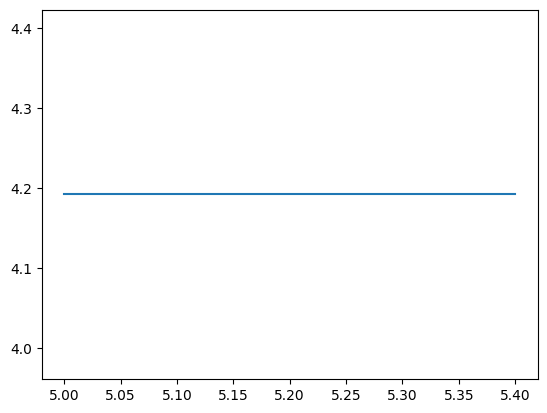

In [47]:
# create two ellipsoids with specified parameters
ellips1 = func.Ellipsoid(a=1, b=1, c=1)
ellips2 = func.Ellipsoid(a=1, b=1, c=1)
# create body from two ellipsis
body = func.Body(ellips1, ellips2, distance=100, 
                 eq_latitude=np.pi / 4, 
                 eq_longitude=np.pi / 4, 
                 init_phase=0., rotation_period=5.0/24)
print(body)


# same position for earth and sun
state_vecs_sun = np.zeros([201, 3])
state_vecs_sun[:, 0] = 1
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['reduc_epoch'] = reduc_epoch
state_vecs_sun
state_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])

# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)

plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)
print(f"min_brightness: {min(total_brightness):.2f}, "
      f"max_brightness: {max(total_brightness):.2f}, "
      f"max/min: {max(total_brightness)/min(total_brightness):.10f}")

# TEST 7: ONE COMPONENTS IS INSIDE ANOTHER
### any $\mathrm{s}$, $\mathrm{e}$, $\beta$, $\lambda$, $(a_1,b_1,c_1)=(1,1,1)$, $(a_2,b_2,c_2)=(0.99,0.99,0.99)$, $d=0$. Should give constant brightness

Body consists of:
Ellipsis with axes: a=1, b=1, c=1,
Ellipsis with axes: a=0.99, b=0.99, c=0.99,
lat=45.0 deg, lon=45.0 deg, phase=0.0, distance=0.0
min_brightness: 2.10, max_brightness: 2.10, max/min: 1.0000000000


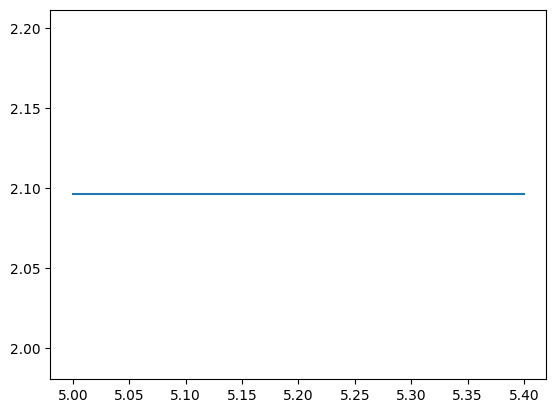

In [48]:
# create two ellipsoids with specified parameters
ellips1 = func.Ellipsoid(a=1, b=1, c=1)
ellips2 = func.Ellipsoid(a=0.99, b=0.99, c=0.99)
# create body from two ellipsis
body = func.Body(ellips1, ellips2, distance=0.0, 
                 eq_latitude=np.pi / 4, 
                 eq_longitude=np.pi / 4, 
                 init_phase=0., rotation_period=5.0/24)
print(body)


# same position for earth and sun
state_vecs_sun = np.zeros([201, 3])
state_vecs_sun[:, 0] = 1
state_vecs_sun = pd.DataFrame(state_vecs_sun, columns=['x', 'y', 'z'])
state_vecs_sun['reduc_epoch'] = reduc_epoch
state_vecs_sun
state_vecs_earth = np.copy(state_vecs_sun)
state_vecs_earth = pd.DataFrame(state_vecs_earth, columns=['x', 'y', 'z', 'reduc_epoch'])

# transform vectors asteroid body-fixed frame coords
vecs_sun_rot = func.rotate_vector(body, state_vecs_sun).to_numpy()
vecs_earth_rot = func.rotate_vector(body, state_vecs_earth).to_numpy()

total_brightness = body.total_brightness(sun_vecs=vecs_sun_rot, earth_vecs=vecs_earth_rot)

plt.plot(state_vecs_sun['reduc_epoch'], total_brightness)
print(f"min_brightness: {min(total_brightness):.2f}, "
      f"max_brightness: {max(total_brightness):.2f}, "
      f"max/min: {max(total_brightness)/min(total_brightness):.10f}")